

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no preço da ITSA (Itaúsa) utilizando a analíse de Regressão linear.




## Bibliografia:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html

## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     - ITSA4 (2018-2019)
     
     
     
   

### Por que usar a ITSA como variável explicativa?

#### A ITSA possui um peso relativamente alto na composição do IBOV (cerca de 3,5%), além disso, ela possui uma correlaçao alta (cerca de 0.86)

## Nosso modelo:

## Importando bibliotecas: 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


## Lendo os arquivos de dados:

In [3]:
ibov=pd.read_csv("bov.csv")
itsa=pd.read_csv("ITSA4.SA.csv")


# Análise exploratória dos dados:

## Dados do Ibovespa

In [4]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


In [5]:
ibov["Adj Close"]

0       85620.000000
1       85641.000000
2       85525.000000
3       84914.000000
4       85973.000000
5       88515.000000
6       87901.000000
7       87269.000000
8       87477.000000
9       86230.000000
10      85547.000000
11      87891.000000
12      89251.000000
13      89710.000000
14      89504.000000
15      89820.000000
16      88624.000000
17      89040.000000
18      88846.000000
19      88115.000000
20      85915.000000
21      86420.000000
22      86977.000000
23      87838.000000
24      87450.000000
25      86400.000000
26      86610.000000
27      85674.000000
28      85269.000000
29      85697.000000
           ...      
219    104745.000000
220    104053.000000
221    101031.000000
222    101516.000000
223    102551.000000
224    100573.000000
225     99981.000000
226    101249.000000
227    101817.000000
228    103832.000000
229    104302.000000
230    104490.000000
231    105423.000000
232    105016.000000
233    104729.000000
234    106022.000000
235    107381

## Dados da ITSA

In [6]:
itsa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,11.62,11.69,11.30,11.30,10.670288,21424800
1,2018-11-09,11.28,11.56,11.21,11.55,10.906357,16869800
2,2018-11-12,11.56,11.57,11.38,11.44,10.802484,14895600
3,2018-11-13,11.50,11.55,11.24,11.36,10.726945,18626600
4,2018-11-14,11.36,11.55,11.31,11.55,10.906357,17762600


In [7]:
itsa["Adj Close"]

0      10.670288
1      10.906357
2      10.802484
3      10.726945
4      10.906357
5      11.321836
6      11.397378
7      11.189639
8      11.180196
9      11.199080
10     10.991341
11     11.416264
12     11.680660
13     11.793972
14     11.652331
15     11.567208
16     11.396964
17     11.396964
18     11.690165
19     11.463171
20     11.113221
21     11.151055
22     11.264551
23     11.444255
24     11.519919
25     11.207804
26     11.262791
27     11.253328
28     11.243863
29     11.120823
         ...    
219    13.180000
220    12.950000
221    12.650000
222    12.500000
223    12.510000
224    12.180000
225    12.140000
226    12.330000
227    12.430000
228    12.700000
229    12.910000
230    12.930000
231    13.170000
232    13.150000
233    13.070000
234    13.260000
235    13.560000
236    13.660000
237    13.650000
238    13.790000
239    13.910000
240    13.780000
241    13.950000
242    13.710000
243    13.760000
244    13.900000
245    14.070000
246    13.9600

## Criando um novo Dataset com apenas as informações necessárias (fechamento) para a análise:

In [8]:
ibov=pd.DataFrame(ibov, columns=['Date','Adj Close'])
itsa=pd.DataFrame(itsa, columns=['Adj Close'])


In [9]:
ibov.head()

,Date,Adj Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


In [10]:
date=ibov['Date']
pontos=ibov['Adj Close']
preco=itsa['Adj Close']

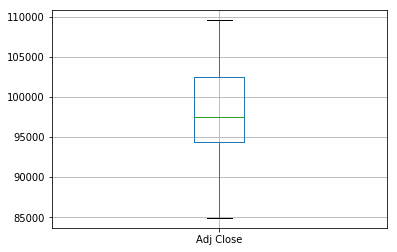

In [11]:
ibov.boxplot();

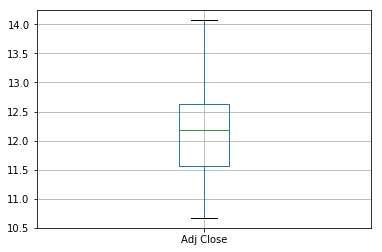

In [12]:
itsa.boxplot();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eb9a7f0>]],
      dtype=object)

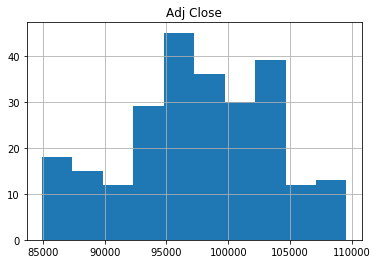

In [38]:
ibov.hist()

## Join dos dois Dataset (Ibov e ITSA)

In [14]:
dados=ibov.join(itsa, lsuffix='_ibov', rsuffix='_itsa')

## Correlação 

In [15]:
dados.corr()

,Adj Close_ibov,Adj Close_itsa
Adj Close_ibov,1.00000,0.86579
Adj Close_itsa,0.86579,1.00000


In [16]:
dados.head()

,Date,Adj Close_ibov,Adj Close_itsa
0,2018-11-08,85620.0,10.670288
1,2018-11-09,85641.0,10.906357
2,2018-11-12,85525.0,10.802484
3,2018-11-13,84914.0,10.726945
4,2018-11-14,85973.0,10.906357


In [17]:
dados.describe()

,Adj Close_ibov,Adj Close_itsa
count,249.000000,249.000000
mean,97595.508879,12.167305
std,5916.391315,0.756215
min,84914.000000,10.670288
25%,94389.000000,11.555626
50%,97457.000000,12.190315
75%,102551.000000,12.633587
max,109581.000000,14.070000


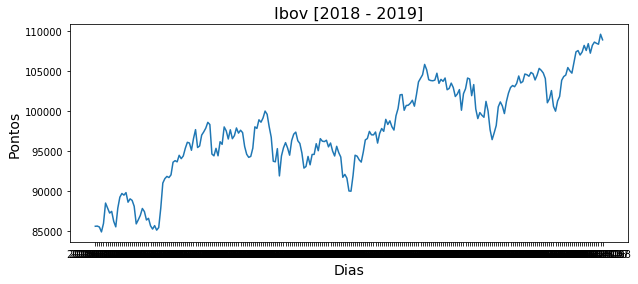

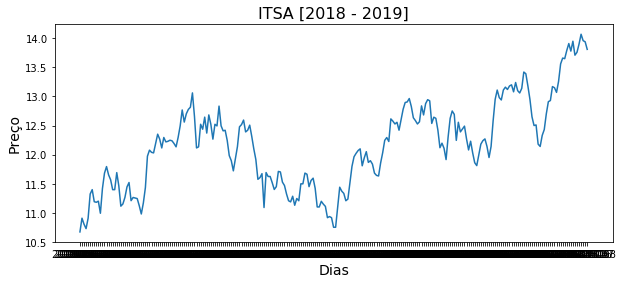

In [18]:
plt.figure(1, figsize=(10,4))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();

plt.figure(1, figsize=(10,4))
plt.plot(date, preco)
plt.title('ITSA [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Preço', fontsize=14)
plt.show();

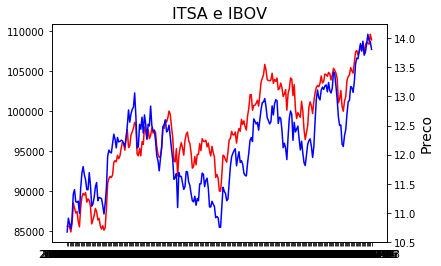

In [19]:
###ARRUMAR ESSE GRAFICO 


x=dados['Date']
y=[dados['Adj Close_ibov'], dados['Adj Close_itsa']]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y[0], 'r', label="Pontos")
ax2.plot(x, y[1], 'b')
plt.title('ITSA e IBOV', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Preco', fontsize=14)
plt.show();

## Gráfico de dispersão:

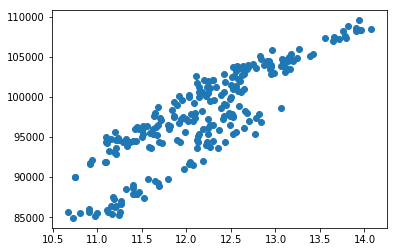

In [20]:
plt.scatter(y[1],y[0])


## Modelo: 

### Separa dados para treinamento e teste

In [21]:
train, test = train_test_split(dados, test_size=0.20)

In [22]:
X_train = np.array(train['Adj Close_itsa']).reshape(-1, 1)
y_train = train['Adj Close_ibov']

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

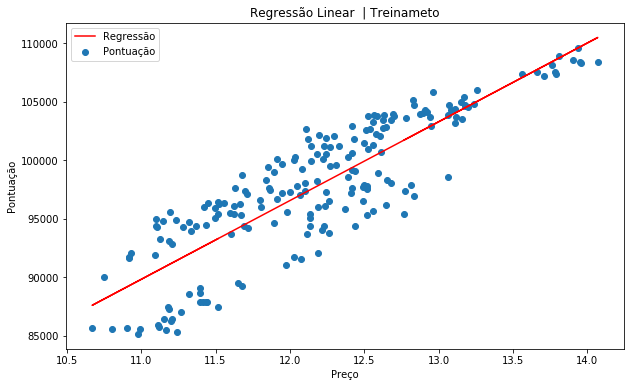

In [24]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Preço')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [25]:
X_test = np.array(test['Adj Close_itsa']).reshape(-1, 1)
y_test = test['Adj Close_ibov']
y_pred = model.predict(X_test)

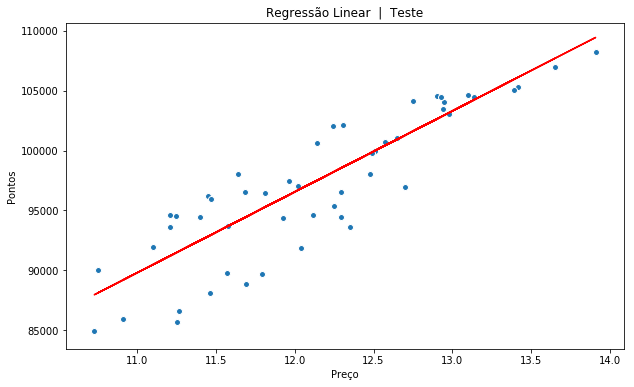

In [26]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test,y_pred , color='r', label='Regressão')
plt.scatter(X_test, y_test, edgecolor='w', label='Pontos')
plt.xlabel('Preço')
plt.ylabel('Pontos')

plt.show()

In [27]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.7701701551468498

In [28]:
## ANALISES DE RESIDUOS MAIS EQUACAO DA RETA

Ibov=B0+B1*ITSA+E

In [29]:
B1=np.asscalar(np.squeeze(model.coef_))
B0=np.squeeze(model.coef_)
itsafuturo=15.5

In [30]:
ibovfuturo=B0+B1*itsafuturo

In [31]:
ibovfuturo

111262.3875686767

# Análise de resíduos 

In [32]:
e=y_test-y_pred

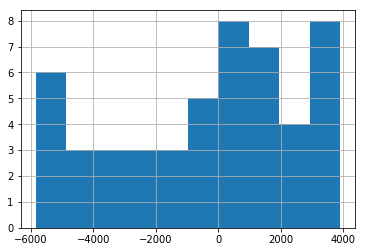

In [33]:
e.hist();

In [34]:
eb=e.mean()

In [35]:
ibovfuturo=B0+B1*itsafuturo+eb

In [36]:
ibovfuturo

110835.20938337609